# MASW - Multi-Channel Analysis of Surface Waves

> Joseph P. Vantassel, The University of Texas at Austin

This notebook performs MASW processing on a selected shot gather.

In [1]:
import utprocess
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fname = "sample_data/vuws_s6.dat"
array = utprocess.Array1d.from_files(fname)

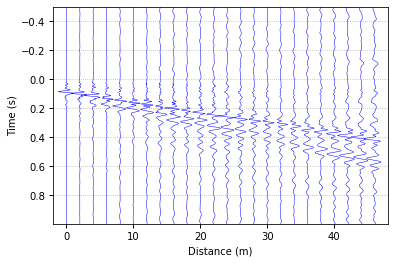

In [3]:
fig, ax = array.plot_waterfall()
plt.show()

In [4]:
fk = utprocess.WavefieldTransform1D(array, "sample_settings/fksettings.json")

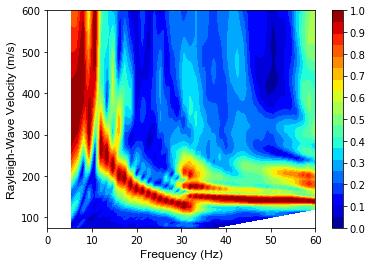

In [5]:
fig, ax = fk.plot_spec(plot_peak=False)
ax.plot(fk.freq, fk.peak_vals, color="#bcbcbc", linestyle=":", linewidth=5, label="Exp. Disp. Data")
ax.set_xlim(0, 60)
ax.set_ylabel("Rayleigh-Wave Velocity (m/s)")
# plt.savefig("vuws_s6.png", dpi=300, bbox_inches="tight")
plt.show()